# **Veri Ön İşleme**

Makine öğrenmesi modelinin amacı genellenebilir yapılar ortaya koymaktır. Belirli olaylar gözlendiğinde belirli tahmin sonuçları vermektir.

### Veri Ön İşleme Genel Bakış

Veri Temizleme (data cleaning / cleasing)

* Gürültülü Veri Analizi
* Eksik  Veri Analizi
* Aykırı Gözlem Analizi

Veri Standardizasyonu

* 0-1 Dönüşümü
* z-skoruna Dönüştürme
* Logaritmik Dönüşüm

Veri İndirgeme

* Gözlem Sayısının Azaltılması
* Değişken Sayısının Azaltılması

Değişken Dönüşümleri

* Sürekli değişkenlerde dönüşümler
* Kategorik değişkenlerde dönüşümler

## **Aykırı Gözlem Analizi**

### Aykırı Gözlem

Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

Aykırılığı ifade eden nümerik değere aykırı değer denir. Aykırı değeri barındıran gözlem birimine aykırı gözlem denir.

Aykırı değer genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır. Yanlılığa sebep olur.

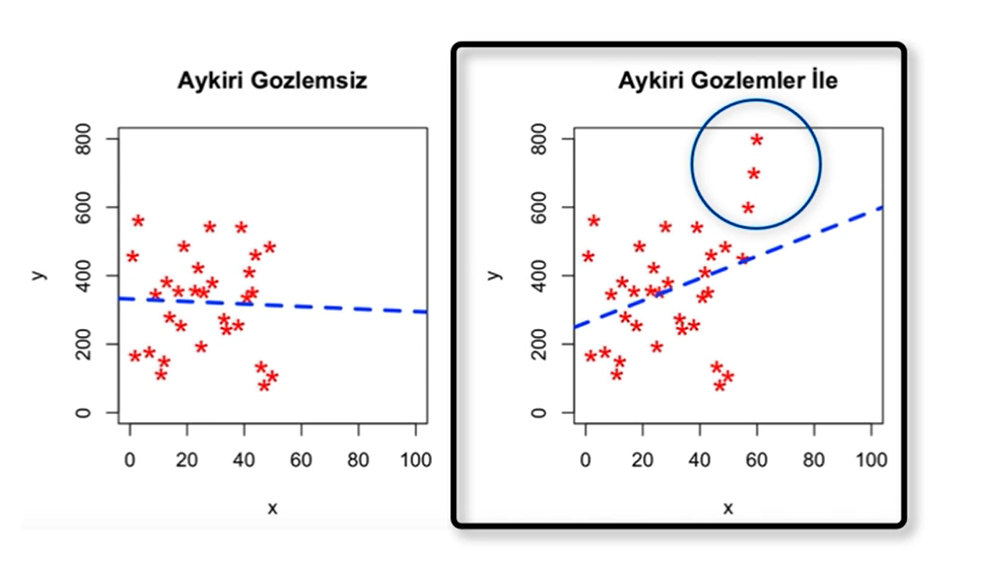

### Kime Göre Neye Göre Aykırı Gözlem?

Veride genel eğilimin oldukça dışına çıkan gözlemlerdir. Veri setinin genel eğiliminin dışına çıkmak aşağıdaki maddelerle tanımlanabilir.

1. Sektör Bilgisi: Örneğin bir emlakçı olarak bir ev tahmin modelinde 1000 metrekarelik evleri modellemeye almamak.
2. Standart Sapma Yaklaşımı: Bir değişkenin ortalamasının üstüne aynı değişkenin standart sapması hesaplanarak eklenir. 1, 2 ya da 3 standart sapma değeri ortalama üzerine eklenerek bu değer eşik değer olarak düşünülür ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.
3. Z-Skoru Yaklaşımı: Standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılımı uyarlanır, yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan -+2,5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ya da altında olan değerler aykırı değer olarak işaretlenir.
4. Boxplot (interquartile range -IQR) Yöntemi: En sık kullanılan yöntemlerden biridir. Değişkenin değerleri küçükten büyüğe doğru sıralanır. Çeyrekliklerine (yüzdeliklerine) yani Q1, Q3 değerlerine karşılık değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

IQR = 1.5 x (Q3 - Q1)

Alt Eşik Değeri = Q1 - IQR

Üst Eşik Değeri = Q3 + IQR

Not: Eğer kurulan modelin bir genelleme kaygısı varsa; zaten çok seyrek olan senaryolar ve genele uymayan yapılar çalışmanın dışında bırakılmalıdır.

### Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float", "int"])
df = df.dropna()
df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

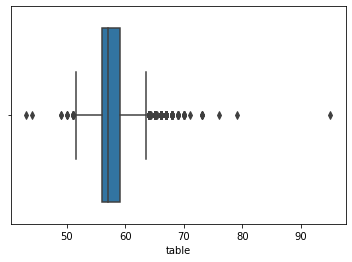

In [4]:
sns.boxplot(x = df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [9]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [10]:
alt_sinir

51.5

In [11]:
ust_sinir

63.5

IQR ile hesaplanmış değerler grafikteki dik çizgilerin değerleridir.

In [12]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [17]:
aykiri_tf = (df_table < alt_sinir)

In [18]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

aykiri_tf'de True olanları (aykırı gözlemleri) seçmek için;

In [19]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [20]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### Aykırı Değer Problemini Çözmek

#### Silme Yaklaşımı

In [23]:
import pandas as pd

In [24]:
type(df_table)

pandas.core.series.Series

In [25]:
df_table = pd.DataFrame(df_table)

In [26]:
df_table.shape

(53940, 1)

In [29]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis = 1)]

'~' sembolü, koşulu sağlamayanları al anlamına gelir.

In [30]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


#### Ortalama ile Doldurma

In [31]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float", "int"])
df = df.dropna()
df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [32]:
df_table = df["table"]

In [33]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [35]:
df_table.mean()

57.45718390804603

In [36]:
df_table[aykiri_tf] = df_table.mean()

In [38]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

#### Baskılama Yöntemi

Aykırılıklar yakalanıp üst taraftaysa üst sınır, alt taraftaysa alt sınır değerine eşitlenir.

In [39]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float", "int"])
df = df.dropna()
df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [40]:
df_table = df["table"]

In [41]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [42]:
alt_sinir

51.5

In [43]:
df_table[aykiri_tf] = alt_sinir

In [44]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

### Çok Değişkenli Aykırı Gözlem Analizi

#### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlar.

Bir noktanın local yoğunluğu, bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabilir. Dolayısıyla burada bir komşuluk yapısı söz konusudur. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendirilir. Aşağıdaki şekilde A noktası aykırı değerdir.

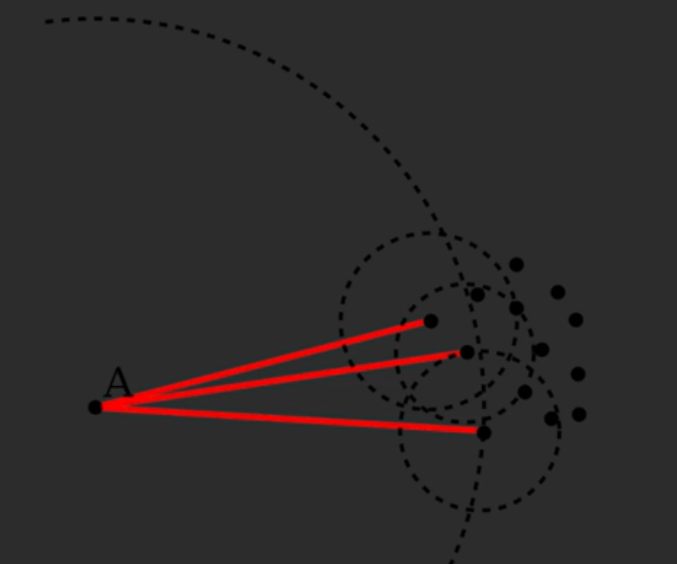

In [21]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float", "int"])
df = df.dropna()
df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [22]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [23]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

n_neighbors: Komşuluk sayısı,  contamination: Yoğunluk

In [24]:
clf.fit_predict(df)

array([ 1, -1, -1, ...,  1,  1,  1])

In [25]:
df_scores = clf.negative_outlier_factor_

In [26]:
df_scores[0:10]

array([-1.11374289, -1.23429179, -1.2933565 , -1.26714354, -1.07513901,
       -1.08846786, -1.09451271, -1.0138337 , -1.64618253, -1.15038476])

In [27]:
np.sort(df_scores)[0:20]

array([-29.3978291 , -26.46951036, -21.30748166, -18.01017463,
       -16.97514699, -16.62995733, -16.03576855, -14.32752813,
       -14.08761108, -13.6431223 , -13.54326147, -13.39416157,
       -12.07661152, -11.64375954, -11.34795868, -11.17339208,
       -10.41971572, -10.19053966, -10.13773379,  -9.94690686])

In [28]:
esik_deger = np.sort(df_scores)[13]

In [29]:
aykiri_tf = df_scores > esik_deger

In [30]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

#### Silme Yöntemi

In [64]:
yeni_df = df[df_scores > esik_deger]

In [65]:
yeni_df

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


Aykırı değerlerden arındırılmış df

In [101]:
aykirilar = df[~aykiri_tf]

In [102]:
aykirilar

,carat,depth,table,x,y,z
2274,1.22,62.6,59.0,6.79,4.24,3.76
4791,1.10,63.0,59.0,6.50,6.47,0.00
11182,1.07,61.6,56.0,0.00,6.62,0.00
14635,1.07,60.6,57.0,6.62,6.67,1.07
15235,1.12,61.6,58.0,6.64,4.11,3.70
20694,1.53,61.9,54.0,7.43,7.50,1.53
21654,1.41,60.7,56.0,7.31,7.22,1.41
24067,2.00,58.9,57.0,8.09,58.90,8.06
24520,1.56,62.2,54.0,0.00,0.00,0.00
26243,1.20,62.1,59.0,0.00,0.00,0.00


Df'deki aykırı değerler

#### Baskılama

In [103]:
df[df_scores == esik_deger]

,carat,depth,table,x,y,z
20694,1.53,61.9,54.0,7.43,7.5,1.53


In [104]:
baski_degeri = df[df_scores == esik_deger]

In [105]:
res = aykirilar.to_records(index = False)

In [106]:
res[:] = baski_degeri.to_records(index = False)

In [107]:
res

rec.array([(1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [108]:
df[~aykiri_tf]

,carat,depth,table,x,y,z
2274,1.22,62.6,59.0,6.79,4.24,3.76
4791,1.10,63.0,59.0,6.50,6.47,0.00
11182,1.07,61.6,56.0,0.00,6.62,0.00
14635,1.07,60.6,57.0,6.62,6.67,1.07
15235,1.12,61.6,58.0,6.64,4.11,3.70
20694,1.53,61.9,54.0,7.43,7.50,1.53
21654,1.41,60.7,56.0,7.31,7.22,1.41
24067,2.00,58.9,57.0,8.09,58.90,8.06
24520,1.56,62.2,54.0,0.00,0.00,0.00
26243,1.20,62.1,59.0,0.00,0.00,0.00


In [109]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [110]:
df[~aykiri_tf]

,carat,depth,table,x,y,z
2274,1.53,61.9,54.0,7.43,7.5,1.53
4791,1.53,61.9,54.0,7.43,7.5,1.53
11182,1.53,61.9,54.0,7.43,7.5,1.53
14635,1.53,61.9,54.0,7.43,7.5,1.53
15235,1.53,61.9,54.0,7.43,7.5,1.53
20694,1.53,61.9,54.0,7.43,7.5,1.53
21654,1.53,61.9,54.0,7.43,7.5,1.53
24067,1.53,61.9,54.0,7.43,7.5,1.53
24520,1.53,61.9,54.0,7.43,7.5,1.53
26243,1.53,61.9,54.0,7.43,7.5,1.53


## **Eksik Gözlem Analizi**

İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir.

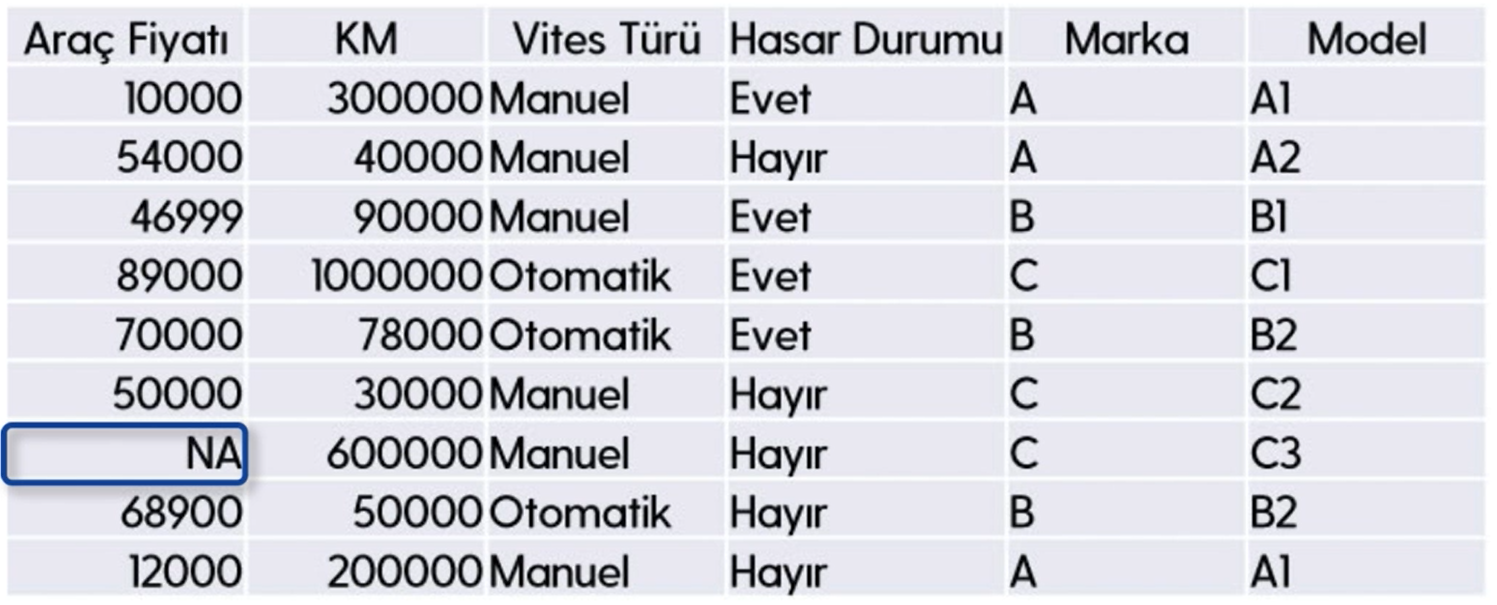

Eksik değere sahip gözlemlerin veri setinden direkt çıkarılması ve rassallığın incelenmemesi, yapılacak istatistiksel çıkarımların ve modelleme çalışmalarının güvenilirliğini düşürecektir.

Eksik gözlemlerin veri setinden direkt çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal olarak oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olabilmektedir.

#### Eksik Veriyi Silmenin Zararları

1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir. Örneğin bir kişinin kredi kartı yoksa kredi kartı harcaması NA olacaktır.
2. NA her zaman eksiklik anlamına gelmez. Bazen 0 anlamında gelir. Örneğin bir kişinin kredi kartı var fakat o ay harcama yapmadıysa kredi kartı harcaması verisi NA veya 0 olabilir.
3. Bilgi kaybına sebep olur.

#### Eksik Veri Türleri

1. Tümüyle Rastlantısal Kayıp: Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemlerdir.
2. Rastlantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türüdür.
3. Rastlantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

#### Eksik Veri Rassallığının Testi

* **Görsel teknikler**
* Bağımsız iki örneklem T testi
* Korelasyon testi
* **Little'nin MCAR testi**

#### Eksik Veri Problemi Nasıl Giderilir?

1. **Silme Yöntemleri**
* Gözlem ya da değişken silme yöntemi
* Liste bazında silme yöntemi (Listwise Method)
* Çiftler bazında silme yöntemi (Pairwise Method)

2. **Değer Atama Yöntemleri**
* Ortanca, ortalama, medyan
* Eş benzer birime atama (hot deck)
* Dış kaynaklı atama

3. **Tahmine Dayalı Yöntemler**
* Makine öğrenmesi
* EM
* Çoklu atama yöntemi

### Eksik Veri Hızlı Çözüm

In [127]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN, np.NaN, 2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1, 
         "V2" : V2, 
         "V3" : V3}
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Eksik Değerlerin Saptanması

In [128]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [129]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [130]:
df.isnull().sum().sum()

7

In [131]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [132]:
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [133]:
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [134]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Eksik Değerlerin Direkt Silinmesi

In [135]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [136]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


df'de etkili olması için df.dropna(inplace = True)

#### Basit Değer Atama

In [137]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [138]:
df["V1"].mean()

6.0

In [139]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [141]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [143]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Eksik Veri Yapısının Görselleştirilmesi

In [144]:
!pip install missingno

In [145]:
import missingno as msno

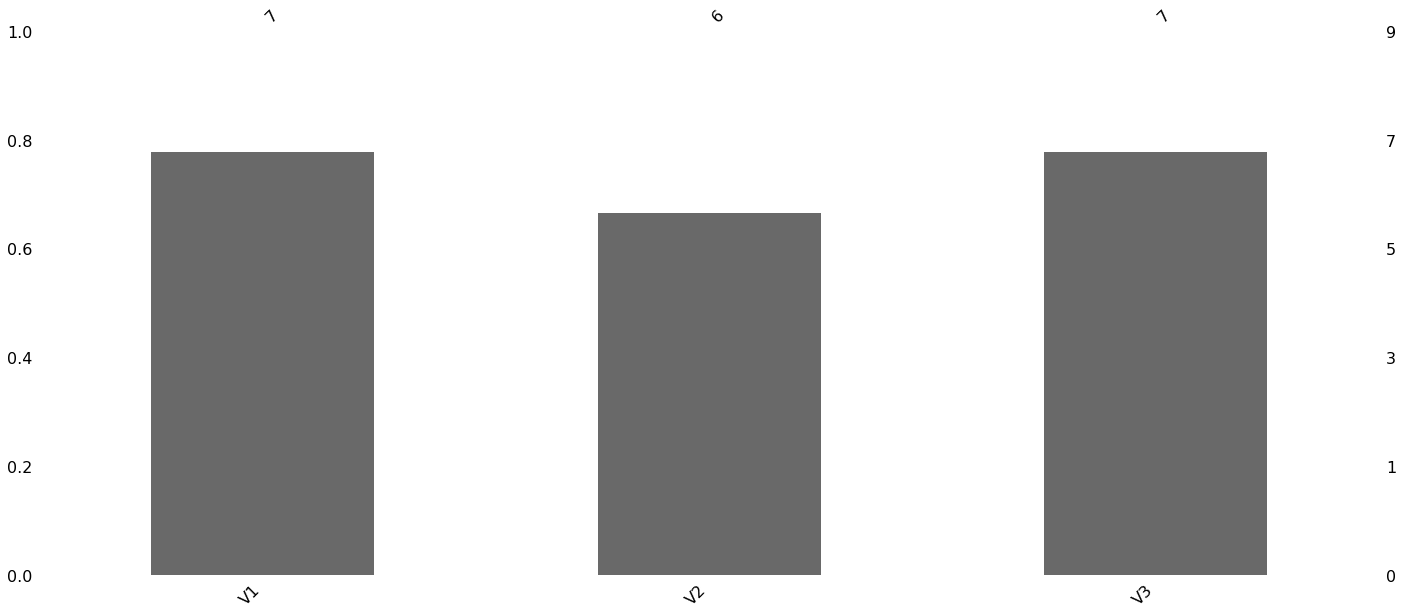

In [147]:
msno.bar(df);

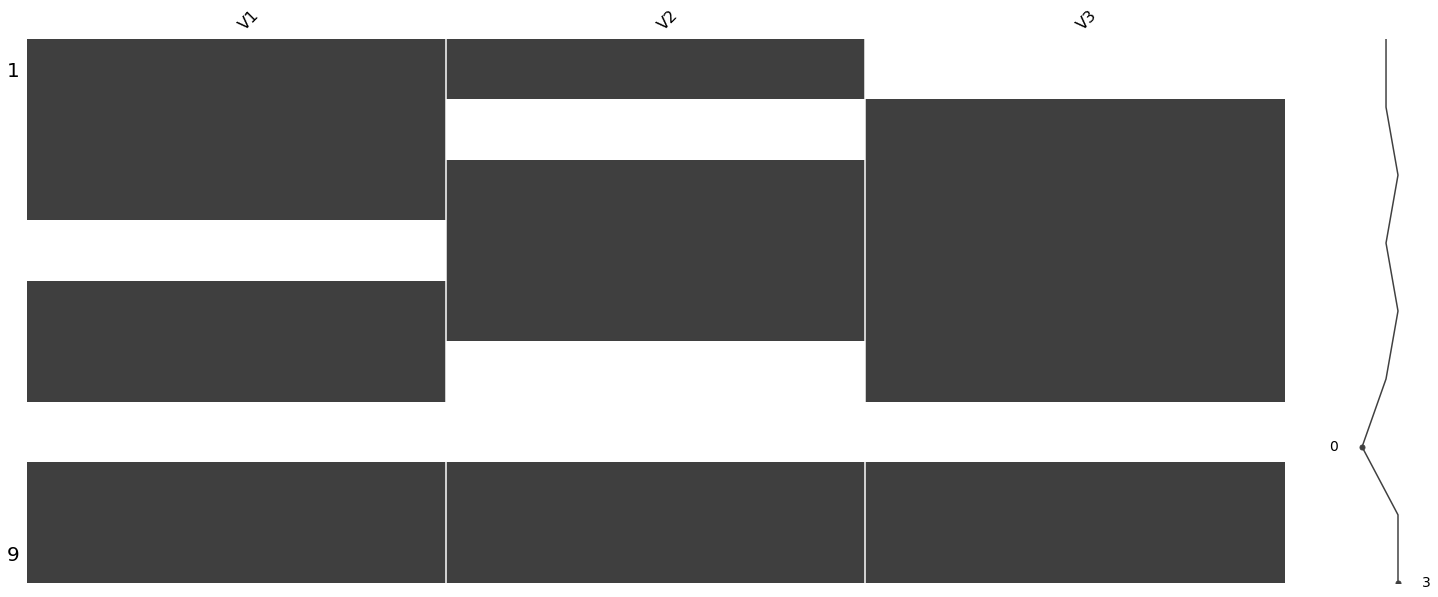

In [148]:
msno.matrix(df);

In [150]:
import seaborn as sns
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [151]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

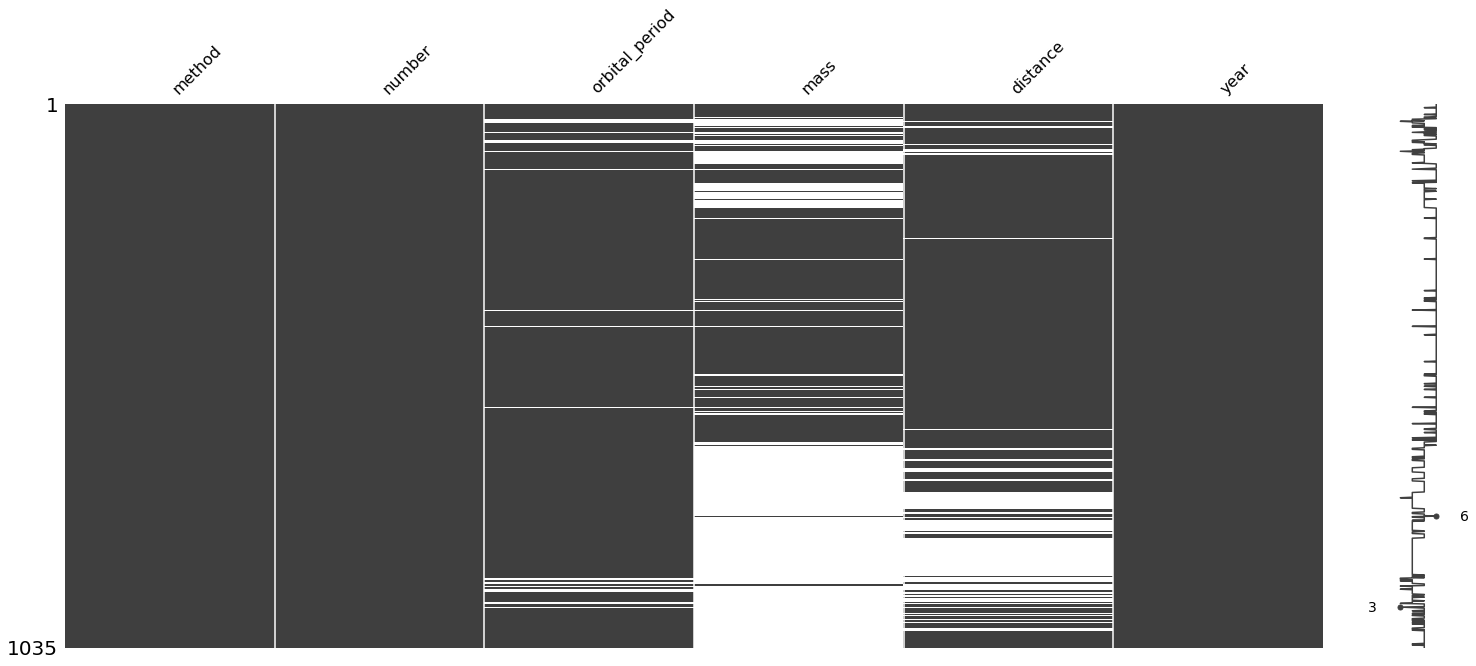

In [153]:
msno.matrix(df);

Gözlemlendiği üzere orbital_period değişkeni ile mass değişkeni arasında bir ilişki vardır. Mass'daki eksikliklerin bazıları orbital_period'a bağlı olarak gerçekleşmiştir.

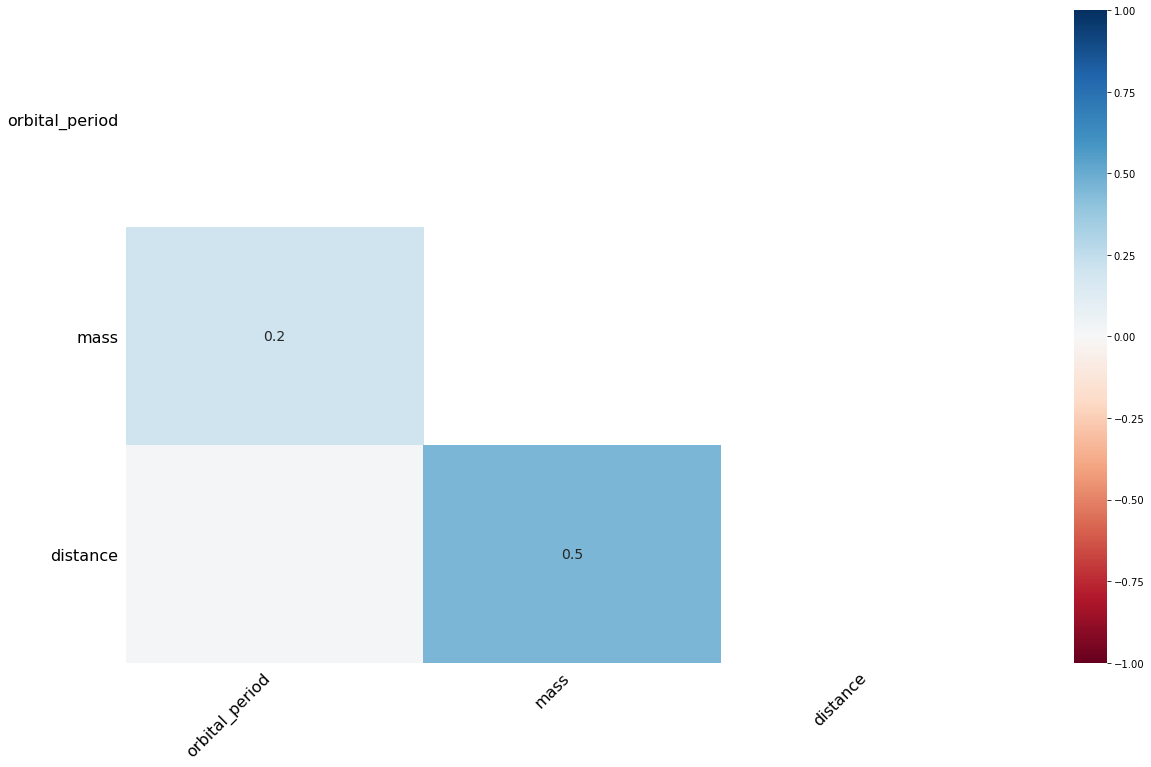

In [154]:
msno.heatmap(df);

Missingno içerisindeki ısı haritası nullity correlationu verir. Bu değer 0 ile 1 arası değer alır.

### Silme Yöntemleri

In [155]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN, np.NaN, 2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1, 
         "V2" : V2, 
         "V3" : V3}
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [156]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [159]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


(how = "all") tüm değerleri eksik olan gözlemi siler.

In [160]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [163]:
df["sil"] = np.NaN

In [165]:
df

,V1,V2,V3,sil
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [166]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama Yöntemleri

In [167]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN, np.NaN, 2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1, 
         "V2" : V2, 
         "V3" : V3}
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Sayısal Değişkenlerde Atama

In [168]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [169]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

**Tüm değişkenler için 1. yol:**

In [173]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


**Tüm değişkenler için 2. yol:**

In [174]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [175]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [177]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

**Tüm değişkenler için 3. yol:**

In [178]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Kategorik Değişken Kırılımında Değer Atama

In [181]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN, np.NaN, 2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
df = pd.DataFrame(
        {"maas" : V1, 
         "V2" : V2, 
         "V3" : V3,
        "departman" : V4}
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [182]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [184]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

### Kategorik Değişkenlerde Değer Atama

In [185]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"], dtype = object)
df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [191]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

Kendisinden sonra gelen değerle doldurma işlemi:

In [192]:
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

Kendisinden önce gelen değerle doldurma işlemi:

In [194]:
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Tahmine Dayalı Değer Atama Yöntemleri

In [195]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64", "int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

#### KNN Algoritması

In [196]:
!pip install ycimpute

In [197]:
from ycimpute.imputer import knnimput

In [198]:
var_names = list(df)

In [199]:
n_df = np.array(df)

In [200]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [210]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.089
Imputing row 101/891 with 0 missing, elapsed time: 0.090
Imputing row 201/891 with 0 missing, elapsed time: 0.091
Imputing row 301/891 with 1 missing, elapsed time: 0.091
Imputing row 401/891 with 0 missing, elapsed time: 0.092
Imputing row 501/891 with 0 missing, elapsed time: 0.093
Imputing row 601/891 with 0 missing, elapsed time: 0.093
Imputing row 701/891 with 0 missing, elapsed time: 0.094
Imputing row 801/891 with 0 missing, elapsed time: 0.095


In [211]:
dff = pd.DataFrame(dff, columns = var_names)

In [212]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,26.026414,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [213]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

#### EM Algoritması

In [219]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64", "int64"])

In [220]:
from ycimpute.imputer import EM

In [221]:
var_names = list(df)

In [222]:
n_df = np.array(df)

In [223]:
dff = EM().complete(n_df)

In [224]:
dff = pd.DataFrame(dff, columns = var_names)

In [225]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## **Değişken Dönüşümleri**

### Değişken Standardizasyonu

Değişken standardizasyonunda değişkenin kendi içerisindeki varyans yapısı veya bilgi yapısı bozulmaz, belli bir standarta oturtulur.

In [64]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array ([7,7,5,8,12])
V3 = np.array ([6,12,5,6,14])
df = pd.DataFrame({"V1" : V1,
                  "V2" : V2,
                  "V3": V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


**Standardizasyon**

In [36]:
from sklearn import preprocessing

In [37]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

**Normalizasyon**

In [39]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

**Min-Max Dönüşümü**

In [40]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [42]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

### Değişken Dönüşümleri

In [43]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Binarize Dönüşüm**

In [66]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

In [68]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

**0-1 Dönüşümü**

In [55]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [48]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [49]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [50]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


**"1 ve Diğerleri (0) Dönüşümü"**

In [51]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [52]:
import numpy as np
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [53]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


**Çok Sınıflı Dönüşüm**

In [56]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [57]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [74]:
tips = sns.load_dataset("tips")
df = tips.copy()

In [75]:
lbe = preprocessing.LabelEncoder()

In [76]:
df["yeni_gun"] = lbe.fit_transform(df["day"])

In [77]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,2
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


Bir kategorik değişken bu şekilde numerik değerlere dönüştürüldüğünde algoritmalarda ciddi problemlere neden olabilir. Bu problemlerin giderilmesi için One-Hot dönüşümü yapılır.

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [58]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [60]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [61]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


One-Hot dönüşümü ile elimizdeki değişkenin sınıf sayısı kadar yeni değişken oluştu ve bu yeni değişkenlerin değerleri 1 ve 0 olarak tanımlandı.

Dummy Değişken Tuzağı: One-Hot dönüşümü sonrasında ortaya çıkan yeni değişkenler, birbirleri tarafından oluşturulabiliyorsa bu durum Dummy değişken tuzağı olarak adlandırılır. Bu durumdan kaçınmak gerekir. Dummy değişken tuzağından kurtulmak için kategorik değişken sınıf sayısının 1 eksiği kadar dummy değişken oluşturulmalıdır.

In [62]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


### Sürekli Değişkeni Kategorik Değişkene Çevirme

In [79]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,2


In [81]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [84]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [85]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

 ### Değişkeni İndexe, İndexi Değişkene Çevirmek

In [86]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,2


In [87]:
df["yeni_degisken"] = df.index

In [89]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [90]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_gun,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,2,11
2,21.01,3.50,Male,No,Sun,Dinner,3,2,12
3,23.68,3.31,Male,No,Sun,Dinner,2,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,2,14


In [91]:
df.index = df["yeni_degisken"]

In [92]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='yeni_degisken', length=244)